In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

In [99]:
df = pd.read_csv("medical_examination.csv")

In [100]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## <font color="blue"> Task 1: Add a BMI column </font>

In [101]:
df["BMI"] = df["weight"] / ( (df["height"]*(10**(-2))) **2)

In [102]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


## <font color="blue"> Task 2: Add an Overweight column in which 1 is overweight, and 0 is not overweight </font>

##### The overweight column checks the BMI column; if the BMI value is above 25, then the column gives a binary value of 1, 0 otherwise.

Note: the astype(int) method is used to convert a TRUE/FALSE into a binary int value 1/0

In [103]:
df["overweight"] = (df["BMI"] > 25).astype(int)

In [104]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


## <font color="blue"> Task 3: Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.</font>

#### We can use the 'replace' method to replace the values we are supposed to.

#### Before we use the method, we must narrow down to the columns needed: 'cholesterol' & 'gluc'.

#### Lets begin by replacing the 1s with a value of 0.

In [105]:
df['cholesterol'] = df['cholesterol'].replace(to_replace = {1:0})
df['gluc'] = df['gluc'].replace(to_replace = {1:0})

In [106]:
df.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,29.384676,1
6,9,22113,1,157,93.0,130,80,3,0,0,0,1,0,37.729725,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,29.983588,1
8,13,17668,1,158,71.0,110,70,0,0,0,0,1,0,28.440955,1
9,14,19834,1,164,68.0,110,60,0,0,0,0,0,0,25.282570,1


#### Now lets replace the values greater than 1 with the value of just 1.

In [107]:
df.loc[df['cholesterol'] > 1, ['cholesterol']] = 1

In [108]:
df.loc[df['gluc'] > 1, ['gluc']] = 1

#### Let's check if our changes were implemented.

In [109]:
df[['cholesterol', 'gluc']].head(20)

,cholesterol,gluc
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0
5,1,1
6,1,0
7,1,1
8,0,0
9,0,0


## <font color="blue"> Task 4: Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png. </font>

##### Go back to this video for some background info: https://www.youtube.com/watch?v=HX7gCUw6FK0

##### First, lets convert the data into long format with 'cardio' as the focus.

In [110]:
df_long = df.melt(id_vars = ['cardio'], value_vars = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

In [111]:
df_long.head(10) # notice the dataframe has only the cardion column, but all the rest of the columns are now values of a single 'variable column'

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
5,0,active,0
6,0,active,1
7,1,active,1
8,0,active,1
9,0,active,0


##### Now lets get the variables that we need only, as the example graphic shows:
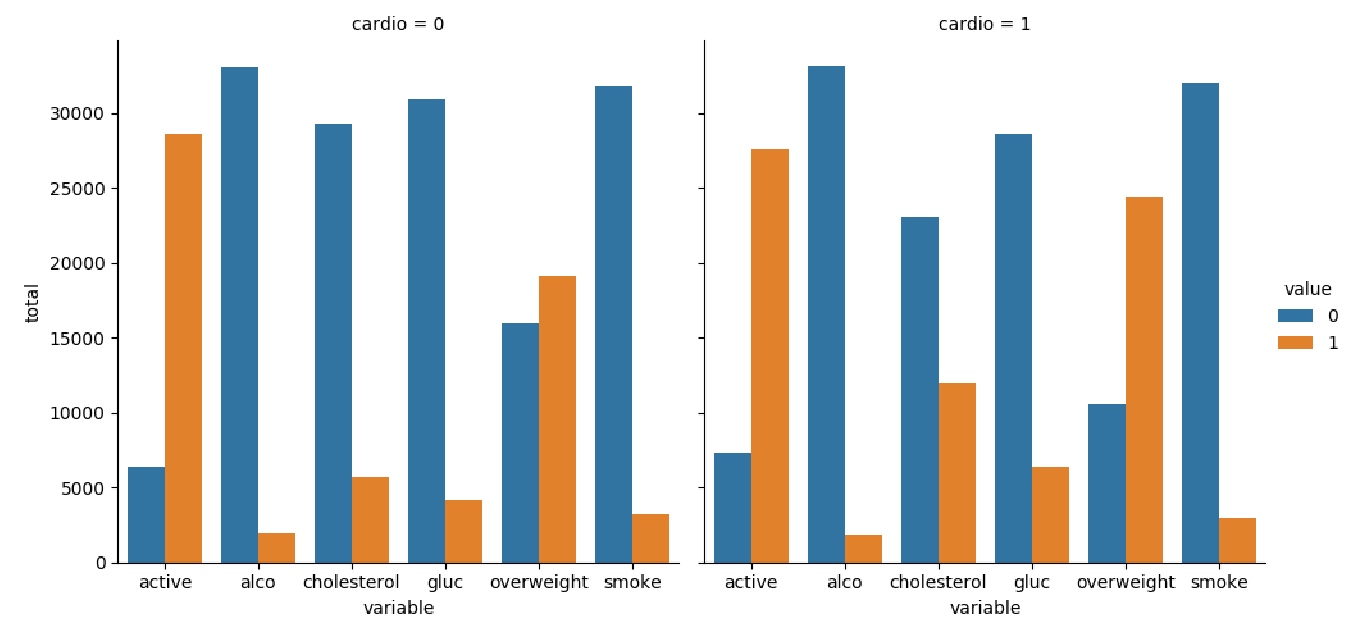

In [112]:
#df_long_cardio = df_long.loc[(df_long['variable'] == 'active') | (df_long['variable'] == 'alco') | (df_long['variable'] == 'cholesterol') | (df_long['variable'] == 'gluc') | (df_long['variable'] == 'Overweight') | (df_long['variable'] == 'smoke')]

In [113]:
#df_long_cardio.head(10)

##### Now that we have our needed dataset format, lets plot it.

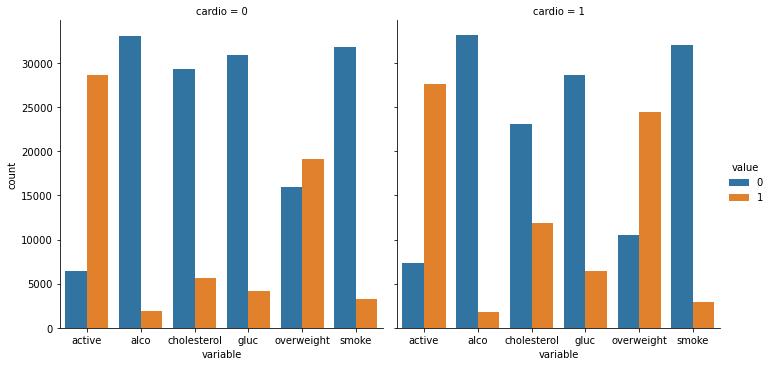

In [114]:
sns.catplot(data = df_long, col = 'cardio', x = 'variable', kind = 'count', hue = 'value', order = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

## <font color="blue"> Task 5: Clean the data. Filter out the following patient segments that represent incorrect data: </font>

### <font color="green"> - Diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi'])) </font>

##### Here we are required to keep the the columns of 'ap_lo' less than or equal to 'ap_hi', as that is the descriptions of the columns.

##### Lets look at the two columns in general at first

In [115]:
df[['ap_lo', 'ap_hi']]

,ap_lo,ap_hi
0,80,110
1,90,140
2,70,130
3,100,150
4,60,100
...,...,...
69995,80,120
69996,90,140
69997,90,180
69998,80,135


##### Now lets filter out the rows that contain 'ap_lo' greater than 'ap_hi'

In [116]:
df.loc[df['ap_lo'] > df['ap_hi']]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
228,314,17489,2,183,98.0,160,1100,0,1,1,0,1,1,29.263340,1
241,334,21932,2,157,60.0,160,1000,1,0,0,0,0,1,24.341758,0
260,357,18217,1,150,83.0,140,800,0,0,0,0,1,1,36.888889,1
329,458,23407,1,176,63.0,160,1000,1,1,0,0,0,1,20.338326,0
345,482,18704,1,154,81.0,140,1000,1,0,0,0,1,1,34.154158,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,0,0,0,0,1,1,29.043709,1
69872,99798,21808,1,152,56.0,160,1000,0,0,0,0,1,1,24.238227,0
69878,99807,21239,2,168,95.0,160,1000,0,0,0,0,1,1,33.659297,1
69885,99816,22417,2,166,78.0,170,1000,0,0,0,0,0,0,28.305995,1


##### These errors could be due to mistyping errors such as adding extra zeros... we will use the drop method to remove these rows.

##### First, we will get the indexes of the rows which have this error.

In [117]:
indexes_ap_lo_greater_ap_hi = df.loc[df['ap_lo'] > df['ap_hi']].index

##### Now that we have the indexes, lets use the indexes as the arguements in the drop method.
NOTE: Use the 'inplace' kwarg to save the changes made.

In [118]:
df.drop(index = indexes_ap_lo_greater_ap_hi, inplace=True)

##### Now lets check if there are still rows which have 'ap_lo' greater than 'ap_hi'

In [119]:
df.loc[df['ap_lo'] > df['ap_hi']]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight


### <font color="green"> - Height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025))) </font>

### <font color="green"> - Height is more than the 97.5th percentile. </font>

In [120]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


##### Lets get the rows that we need to remove.

In [121]:
df.loc[(df['height'] < df['height'].quantile(0.025)) | (df['height'] > df['height'].quantile(0.975))]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
14,23,14532,2,181,95.0,130,90,0,0,1,1,1,0,28.997894,1
62,81,20330,2,187,115.0,130,90,0,0,0,1,1,0,32.886271,1
65,87,21752,1,148,80.0,130,90,0,0,0,0,1,1,36.523009,1
76,105,20397,2,188,105.0,120,80,0,0,0,0,1,1,29.708013,1
94,127,15946,2,185,88.0,133,89,1,1,0,0,1,0,25.712199,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69934,99901,15843,1,143,70.0,120,90,1,0,0,0,1,1,34.231503,1
69938,99909,22608,1,149,61.0,130,90,1,1,0,0,1,0,27.476240,1
69975,99963,21264,2,182,100.0,120,80,0,0,0,0,1,1,30.189591,1
69981,99972,17500,2,182,110.0,130,90,1,1,0,0,1,1,33.208550,1


##### Once again, we will use the drop method.

In [122]:
indexes_height = df.loc[(df['height'] < df['height'].quantile(0.025)) | (df['height'] > df['height'].quantile(0.975))].index

In [123]:
df.drop(index = indexes_height, inplace=True)

### <font color="green"> - Weight is less than the 2.5th percentile. </font>

### <font color="green"> - Weight is more than the 97.5th percentile. </font>

In [124]:
df.loc[(df["weight"] < df["weight"].quantile(0.025)) | (df['weight'] > df['weight'].quantile(0.975))]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
15,24,16782,2,172,112.0,120,80,0,0,0,0,0,1,37.858302,1
23,33,23376,2,156,45.0,110,60,0,0,0,0,1,0,18.491124,0
44,59,19764,1,154,50.0,170,80,1,0,0,0,1,1,21.082813,0
46,61,18207,1,162,107.0,150,90,1,0,0,0,1,1,40.771224,1
80,109,16591,1,159,49.0,120,70,0,0,0,0,1,0,19.382145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69946,99925,21333,1,164,115.0,130,80,0,0,0,0,1,1,42.757287,1
69947,99930,23305,2,172,113.0,110,80,0,0,0,0,0,1,38.196322,1
69961,99948,16598,1,161,50.0,110,75,0,0,0,0,1,0,19.289379,0
69987,99979,18852,1,151,49.0,120,80,0,0,0,0,1,0,21.490286,0


In [125]:
indexes_weight = df.loc[(df["weight"] < df["weight"].quantile(0.025)) | (df['weight'] > df['weight'].quantile(0.975))].index

In [126]:
df.drop(index = indexes_weight, inplace = True)

## <font color="blue"> Task 6: Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.
 </font>
 
 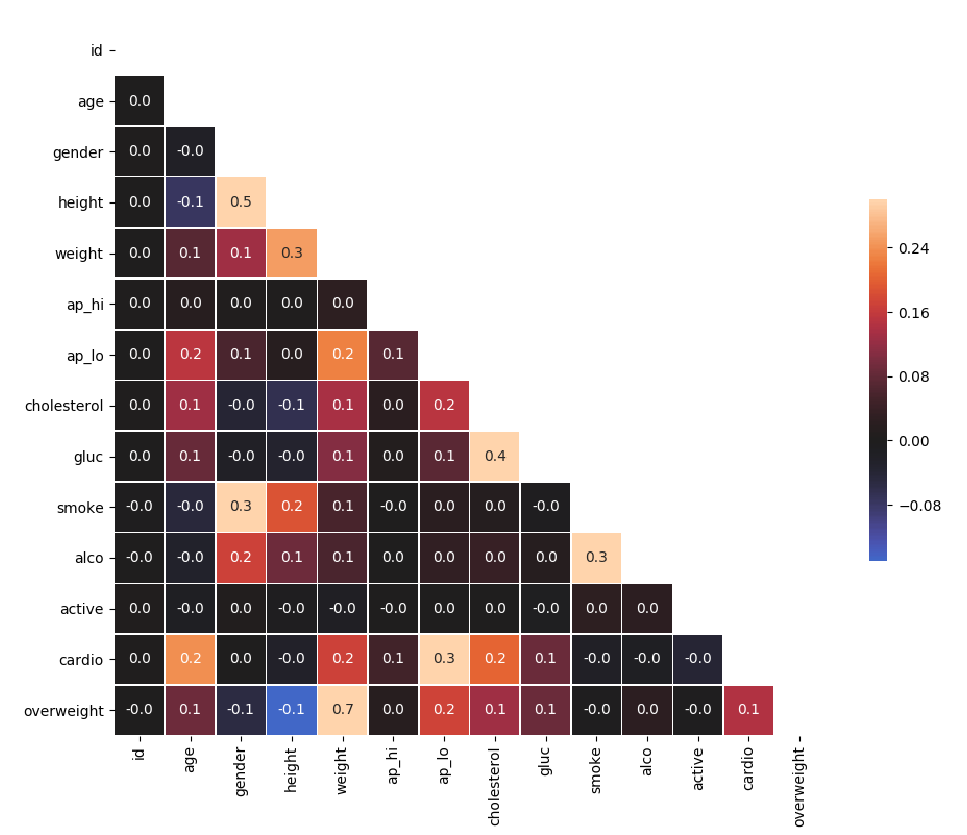

##### Lets first transform our dataset into the needed form

In [90]:
df_matrix = df.corr()

In [91]:
df_matrix.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
id,1.000000,0.002623,0.003799,0.000221,0.000144,0.003489,0.000429,0.003867,0.002477,-0.002403,-0.001039,0.005890,0.003770,0.000050,-0.000769
age,0.002623,1.000000,-0.018274,-0.077426,0.069705,0.018482,0.152787,0.129582,0.087280,-0.044208,-0.026956,-0.011471,0.239987,0.110329,0.089282
gender,0.003799,-0.018274,1.000000,0.504722,0.130116,0.004941,0.059500,-0.037669,-0.021178,0.337682,0.169178,0.007702,0.001727,-0.138660,-0.055146
height,0.000221,-0.077426,0.504722,1.000000,0.248868,0.004300,0.015356,-0.064477,-0.031410,0.187389,0.089257,-0.005042,-0.025673,-0.276587,-0.156139
weight,0.000144,0.069705,0.130116,0.248868,1.000000,0.026527,0.223786,0.132686,0.104475,0.055805,0.058286,-0.012112,0.166886,0.858664,0.655764
ap_hi,0.003489,0.018482,0.004941,0.004300,0.026527,1.000000,0.072260,0.022606,0.011004,-0.001978,0.000607,-0.000162,0.050321,0.024453,0.016900
ap_lo,0.000429,0.152787,0.059500,0.015356,0.223786,0.072260,1.000000,0.148701,0.073920,0.022997,0.031839,0.002184,0.326125,0.213072,0.169567
cholesterol,0.003867,0.129582,-0.037669,-0.064477,0.132686,0.022606,0.148701,1.000000,0.383601,0.012797,0.037588,0.002804,0.202257,0.164566,0.126770
gluc,0.002477,0.087280,-0.021178,-0.031410,0.104475,0.011004,0.073920,0.383601,1.000000,-0.004203,0.013617,-0.009629,0.088267,0.119661,0.086850
smoke,-0.002403,-0.044208,0.337682,0.187389,0.055805,-0.001978,0.022997,0.012797,-0.004203,1.000000,0.341434,0.027203,-0.020605,-0.043446,-0.003981


##### Now we can plot the heatmap using seaborn

<AxesSubplot:>

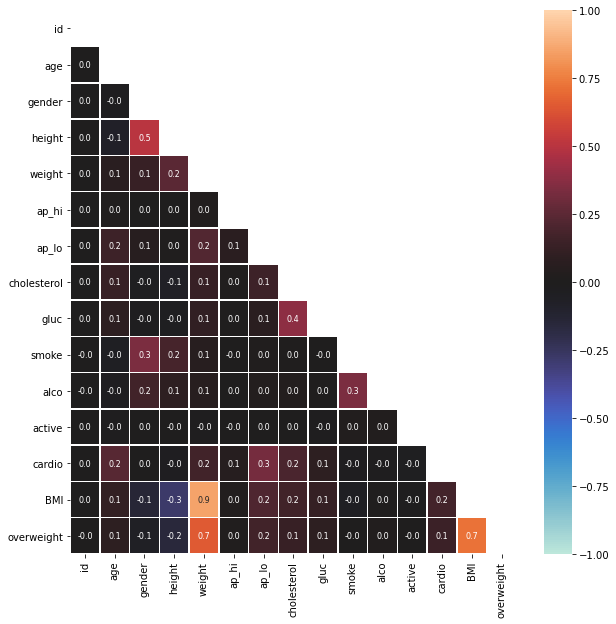

In [92]:
mask = np.zeros_like(df_matrix)
mask[np.triu_indices_from(mask)] = True      ### code to mask upper triangle, from the seaborn heatmap() documentation

plt.figure(figsize = (10, 10))
sns.heatmap(data = df_matrix,
            mask = mask, 
            annot = True,
            linecolor = 'white', 
            linewidths = 0.5, 
            center = 0, 
            vmin = -1, 
            vmax = 1,
            fmt = '.1f',
            annot_kws = {
               'fontsize': 8 
           })